In [ ]:
# Importing Library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Reading the training dataset in a dataframe using Pandas
df = pd.read_csv("train.csv")

# Reading the test dataset in a dataframe using Pandas
test = pd.read_csv("test.csv")

In [ ]:
# Store total number of observation in training dataset
df_length =len(df)

# Store total number of columns in testing data set
test_col = len(test.columns)

In [ ]:
# Summary of numerical variables for training data set

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: >

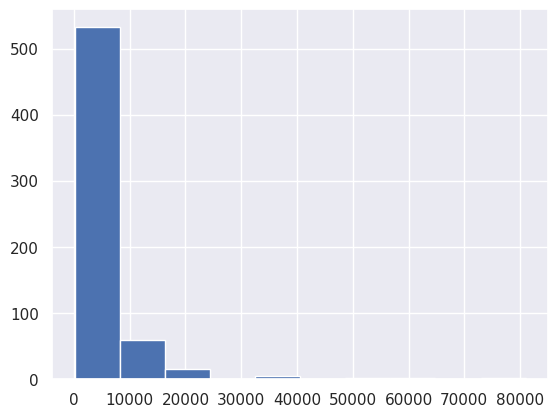

In [ ]:
# Box Plot for understanding the distributions and to observe the outliers.

%matplotlib inline

# Histogram of variable ApplicantIncome

df['ApplicantIncome'].hist()

<Axes: >

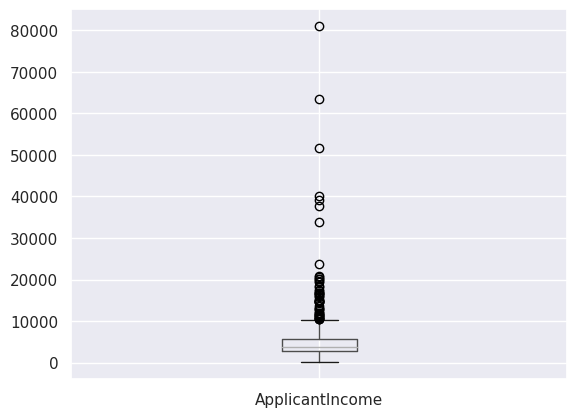

In [ ]:
# Box Plot for variable ApplicantIncome of training data set

df.boxplot(column='ApplicantIncome')

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

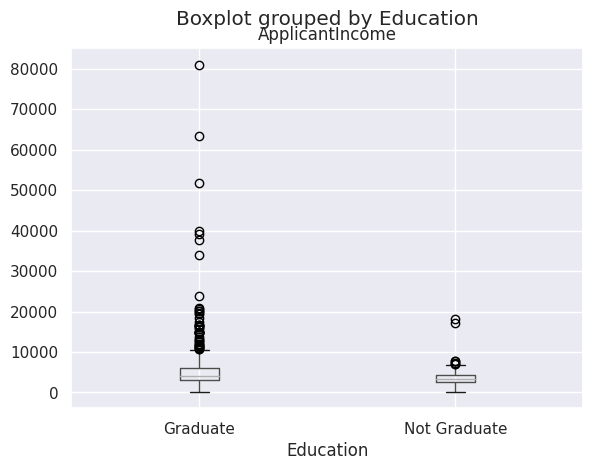

In [ ]:
# Box Plot for variable ApplicantIncome by variable Education of training data set

df.boxplot(column='ApplicantIncome', by = 'Education')

<Axes: >

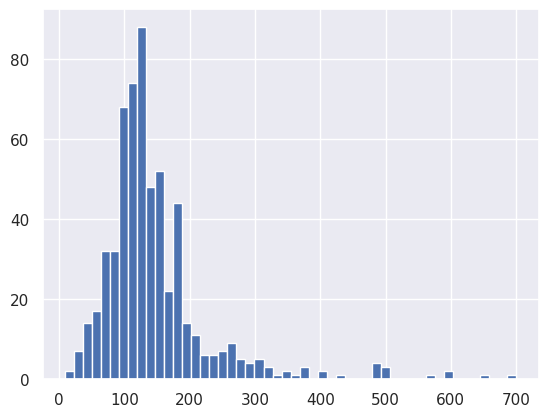

In [ ]:
# Histogram of variable LoanAmount

df['LoanAmount'].hist(bins=50)

<Axes: >

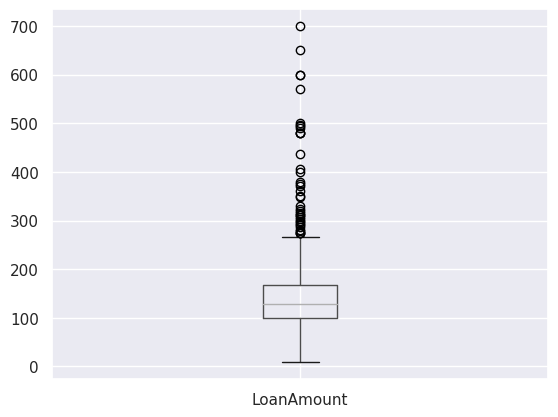

In [ ]:
# Box Plot for variable LoanAmount of training data set

df.boxplot(column='LoanAmount')

<Axes: title={'center': 'LoanAmount'}, xlabel='Gender'>

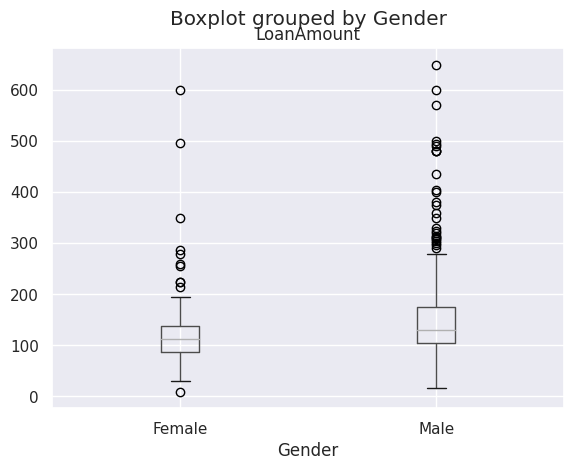

In [ ]:
# Box Plot for variable LoanAmount by variable Gender of training data set

df.boxplot(column='LoanAmount', by = 'Gender')

In [ ]:
# Loan approval rates in absolute numbers
loan_approval = df['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


In [ ]:
# Credit History and Loan Status
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [ ]:
#Function to output percentage row wise in a cross table
def percentageConvert(ser):
    return ser/float(ser[-1])

# Loan approval rate for customers having Credit_History (1)
df=pd.crosstab(df ["Credit_History"], df ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
loan_approval_with_Credit_1 = df['Y'][1]
print(loan_approval_with_Credit_1*100)

79.57894736842105


In [ ]:
df['Y']

Credit_History
0.0    0.078652
1.0    0.795789
All    0.682624
Name: Y, dtype: float64

In [ ]:
print(df.columns)
df = pd.read_csv("train.csv")

Index(['N', 'Y', 'All'], dtype='object', name='Loan_Status')


In [ ]:
# Replace missing value of Self_Employed with more frequent category
df['Self_Employed'].fillna('No',inplace=True)

<Axes: >

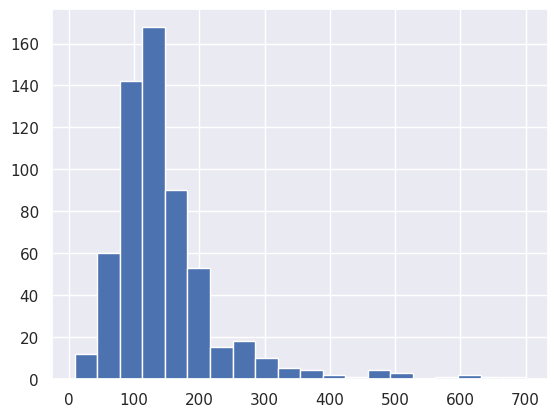

In [ ]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
df['LoanAmount'].hist(bins=20)

<Axes: >

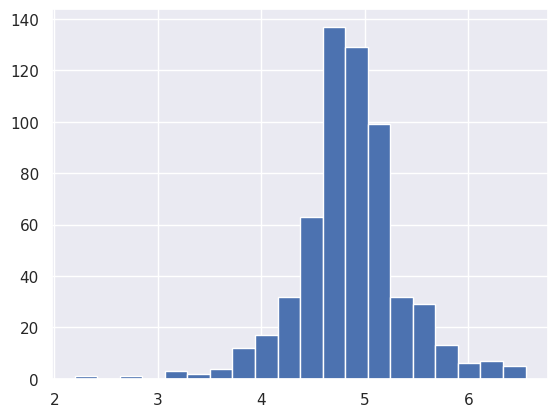

In [ ]:
# Perform log transformation of TotalIncome to make it closer to normal
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
df['LoanAmount_log'].hist(bins=20)

In [ ]:
# Impute missing values for Gender
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

# Convert all non-numeric values to number
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status           object
TotalIncome          float64
LoanAmount_log       float64
dtype: object

In [ ]:
#Import models from scikit learn module:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

#Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
    # ... (previous code)

    # Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = []

    for train, test in kf.split(data):
        # Filter training data
        train_predictors = data[predictors].iloc[train, :]
        train_target = data[outcome].iloc[train]

        # Fit the model on the training data
        model.fit(train_predictors, train_target)

        # Make predictions on the test data
        test_predictions = model.predict(data[predictors].iloc[test, :])

        # Calculate and store the accuracy for each fold
        accuracy = metrics.accuracy_score(data[outcome].iloc[test], test_predictions)
        error.append(accuracy)

    # Calculate the mean accuracy across all folds
    mean_accuracy = np.mean(error)
    print("Accuracy :", mean_accuracy * 100, "%")


    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [ ]:
#Combining both train and test dataset

#Create a flag for Train and Test Data set
df['Type']='Train'
test['Type']='Test'
fullData = pd.concat([df,test],axis=0, sort=True)

#Look at the available missing values in the dataset
fullData.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        29
Dependents            10
Education              0
Gender                11
LoanAmount            27
LoanAmount_log       389
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         23
TotalIncome          367
Type                   0
dtype: int64

In [ ]:
#Identify categorical and continuous variables
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [ ]:
#Imputing Missing values with mean for continuous variable
fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)
fullData['LoanAmount_log'].fillna(fullData['LoanAmount_log'].mean(), inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)

<Axes: >

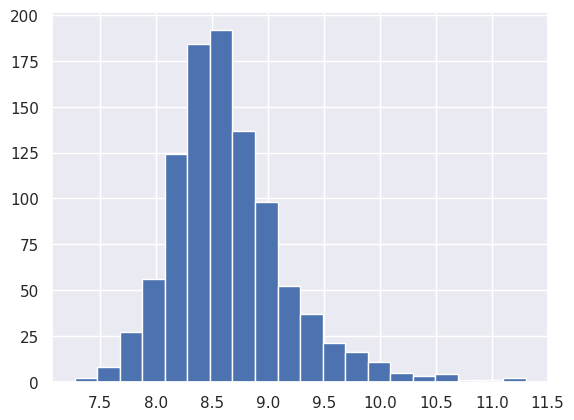

In [ ]:
#Create a new column as Total Income

fullData['TotalIncome']=fullData['ApplicantIncome'] + fullData['CoapplicantIncome']

fullData['TotalIncome_log'] = np.log(fullData['TotalIncome'])

#Histogram for Total Income
fullData['TotalIncome_log'].hist(bins=20)

In [ ]:
#create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))
number = LabelEncoder()
train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']
train_modified.loc[:, "Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))

<ipython-input-57-a0e79234a0f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_modified.loc[:, "Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))
<ipython-input-57-a0e79234a0f3>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_modified.loc[:, "Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))


In [ ]:
from sklearn.linear_model import LogisticRegression


predictors_Logistic=['Credit_History','Education','Gender']

x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values

x_test=test_modified[list(predictors_Logistic)].values

In [ ]:
# Create logistic regression object
model = LogisticRegression()
#kf = KFold(n_splits=5)

# Train the model using the training sets
model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

#Store it to test dataset
test_modified['Loan_Status']=predicted

outcome_var = 'Loan_Status'

classification_model(model, df,predictors_Logistic,outcome_var)

test_modified.to_csv("Logistic_Prediction.csv",columns=['Loan_ID','Loan_Status'])

<ipython-input-65-943b9a8bc5ef>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_modified['Loan_Status']=predicted


Accuracy : 80.9462881514061 %
